# Dataset Preparation

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](ここに以下の書式でURLを入れる) 
[![github](https://badgen.net/badge/:status/View%20On%20Github/black?icon=github&label)](https://github.com/AtomScott/SoccerTrack)
[![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=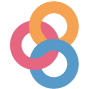)](https://)

---

Here we show how to download datasets that integrate with `SportsLabKit`.

## SoccerTrack

The SoccerTrack Dataset is available to download from Kaggle. 

- [SoccerTrack (Kaggle)](https://www.kaggle.com/datasets/atomscott/soccertrack)

![](assets/kaggle_screenshot.webp)

> You will need a Kaggle account to download the dataset!

### How to download from Kaggle using `KaggleDownloader`

SoccerTrack a helper class called `KaggleDownloader` to download the dataset from directly from Kaggle. However, you will need to authenticate your kaggle ccount first. To do so, follow the intructions by the `KaggleDownloader` class at initialisation.

In [1]:
import sportslabkit as slk

dl = slk.datasets.KaggleDownloader()

authenticate:0172  💬| Authentication successful. 


Without a Kaggle account you will not be able to download the dataset with this method. After authenticating your Kaggle account, you can download the dataset by calling the `download()` method. The dataset will be downloaded to the directory specified by the `path` argument. The default value is `/path/to/soccertrack/soccertrack/datasets/'. 

In [2]:
%%script false --no-raise-error # comment out this line to run this cell

dl = KaggleDownloader()

path = dl.download(force=False)

It is also possible to download files individually by specifying the `file` argument. The default value is `None`, which will download all files. The `file` must be a string representing the name of the file/folder to download. For example, to download the top-view dataset, you can call `download(file='topview')`. 

In [3]:
%%script false --no-raise-error # comment out this line to run this cell
from sportslabkit.logger import show_df # This just makes the df viewable in the notebook.

save_path = dl.download(file_name='wide_view/annotations/F_20200220_1_0000_0030.csv', path='.', force=True)
df = slk.load_df(save_path)

show_df(df.head())

The `get_path` method returns the path to the downloaded dataset. A usage example is shown below.

In [4]:
# show the available datasets
slk.datasets.get_path()

# show the path to the dataset
wide_view_path = slk.datasets.get_path('wide_view')

# get a csv-mp4 pair from the wide-view dataset
wide_view_csv = slk.datasets.get_path('wide_view/videos/F_20200220_1_0000_0030.csv')
wide_view_mp4 = slk.datasets.get_path('wide_view/annotations/F_20200220_1_0000_0030.mp4')

Available keys:
 - GNSS
 - top_view
 - wide_view
 - drone_keypoints
 - fisheye_keypoints
 - gnss_keypoints


If the path you specify is invalid, the `get_path()` method will raise a `ValueError`.

In [5]:
wide_view_path = slk.datasets.get_path('imagenet')

ValueError: The dataset 'imagenet' is not available. Available datasets are GNSS, top_view, wide_view, drone_keypoints, fisheye_keypoints, gnss_keypoints